In [1]:
from litho import Lithosphere
from litho.thermal import TM1, TM2, TM3
from litho.mechanic import MM
from litho.plots import plot

/home/zindo/Documents/2023_fin/cod_termal_temporal/cod_termal_exploration_2023/litho/plots.py:87: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cmap is 'no':


In [2]:
# Crear una instancia de la clase "Lithosphere", llamada "L1"
L1 = Lithosphere()
# Ver contenidos de "L1"
L1.state

<xarray.Dataset>
Dimensions:     (lon: 101, lat: 176)
Coordinates:
  * lon         (lon) float64 -80.0 -79.8 -79.6 -79.4 ... -60.4 -60.2 -60.0
  * lat         (lat) float64 -10.0 -10.2 -10.4 -10.6 ... -44.6 -44.8 -45.0
Data variables:
    Z0          (lon, lat) float64 -4.399 -4.993 -5.363 ... -0.4159 -0.4176
    Zi          (lon, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    Zm          (lon, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    Zb          (lon, lat) float64 nan nan nan nan nan ... nan nan nan nan nan
    lab_domain  (lat, lon) bool False False False False ... True True True True
    lab_start   (lat) float64 -77.0 -77.0 -77.0 -76.8 ... -73.0 -73.2 -80.0

<GeoAxes: xlabel='lon', ylabel='lat'>

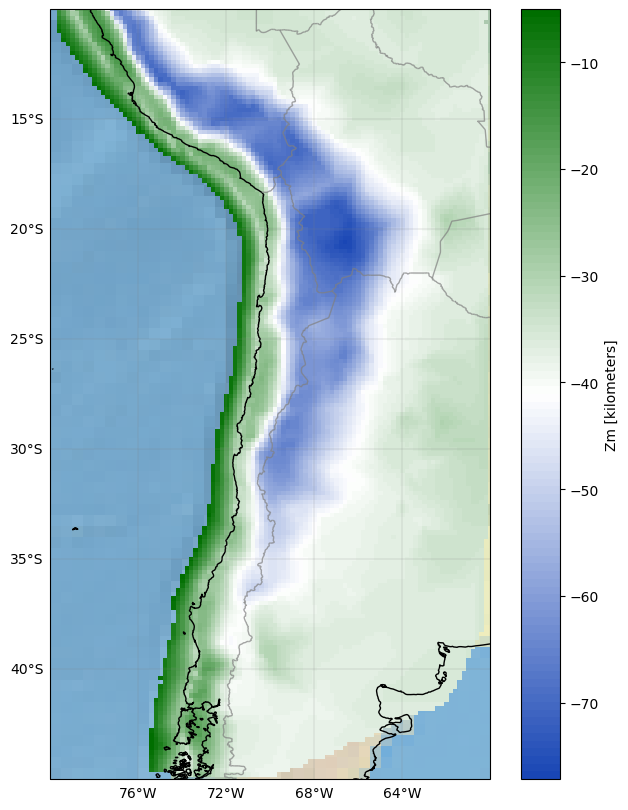

In [3]:
# Plotear una capa de "L1"
#plot(L1.get_topo())
#plot(L1.get_icd())
plot(L1.get_moho())
#plot(L1.get_slab_lab())
# Plotear area slab/area lab
#plot(L1.get_lab_domain())

In [4]:
# Ajustar variables termales
tc = {
    'Tp': 1375.0,    #[ºC]                                                                                                                                                                                                                                              
    'G': 0.0004,     #[K/m]                                                         
    'kappa': 1e-06,  #[m2/s]                                                        
    'alpha': 20.0,   #[º]                                                           
    'V': 6.6e4,      #[m/Ma]                                                        
    'ks': 2.5,       #[W/mk]
    'b': 1.0,                                                                       
    'D': 0.0015,
}

TM1_a = TM1(H0=3e-6, delta=10, k=2.0, constants=tc)

TM2_a = TM2(Huc=1.65e-6, Hlc=4e-7, k=2.0, constants=tc)

TM3_a = TM3(Huc=1.65e-6, Hlc=4e-7, kuc=3.0, klcm=1.0, constants=tc)

# Asignar un modelo termal a "L1"
L1.set_thermal_state(TM1_a)

.

<GeoAxes: xlabel='lon', ylabel='lat'>

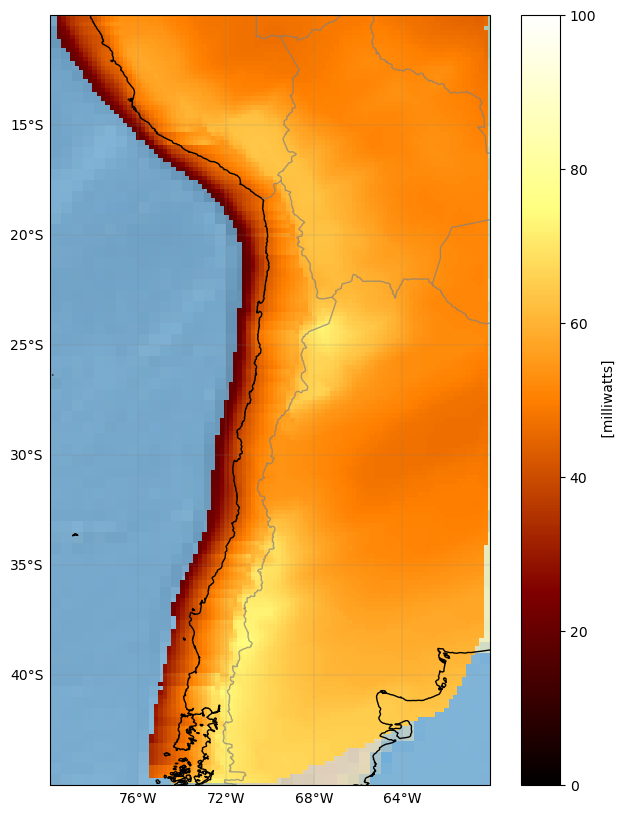

In [5]:
# Plotear surface heat flow de "L1"
plot(L1.get_surface_heat_flow(), vmin=0, vmax=100)

In [6]:
L1.get_slab_lab().sel(lat=-28, lon=-60.2)

<xarray.DataArray 'Zb' ()>
array(-146.52761841)
Coordinates:
    lon      float64 -60.2
    lat      float64 -28.0
Attributes:
    name:     Lithosphere base
    units:    kilometers

<Axes: title={'center': 'lat = -28.0'}, xlabel='lon', ylabel='Z0 [kilometers]'>

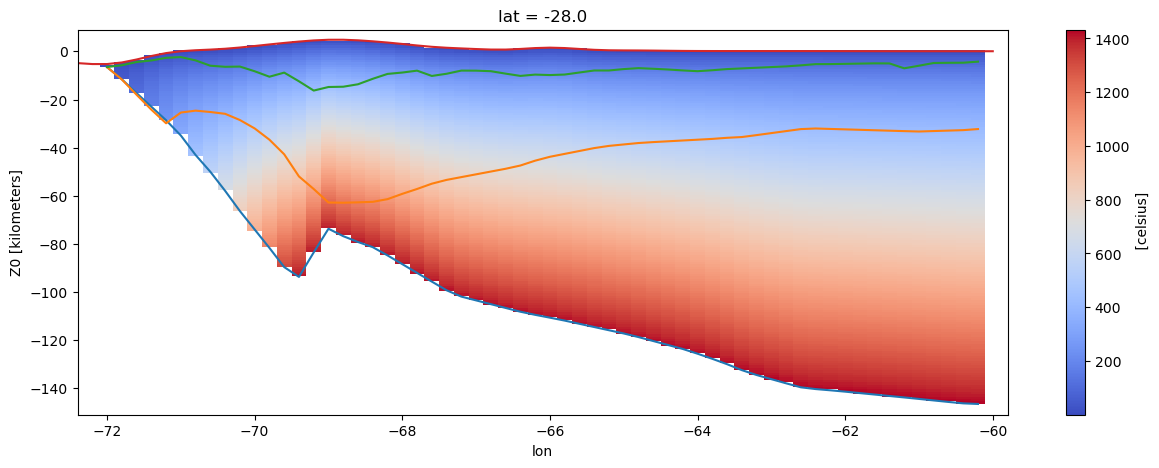

In [7]:
# Plotear sección transversal de la geoterma de "L1"
#L1.set_depths_array({'lat': -30})
#plot(L1.get_geotherm())
# O...
plot(L1.get_geotherm({'lat': -28}))
# Plotear sección transversal de de heat flow de "L1"
#plot(L1.get_heat_flow({'lat': -30}))
# Guardar figura en archivo pdf
#import matplotlib.pyplot as plt
#plt.savefig('nombre_pdf2.pdf')

<Axes: title={'center': 'lon = -70.0, lat = -20.0'}, xlabel='depth', ylabel=' [milliwatts]'>

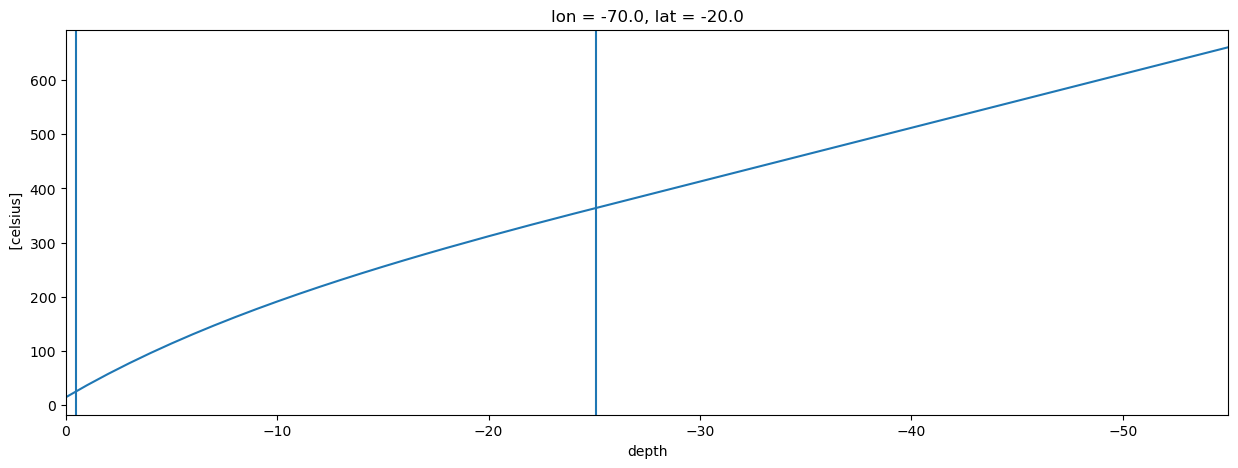

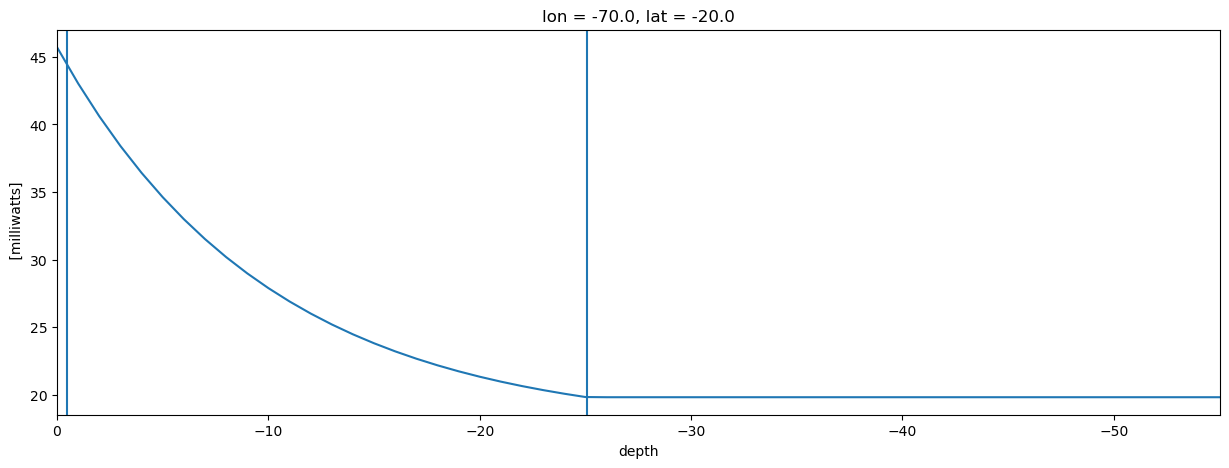

In [8]:
# Plotear perfil de profundidad de geoterma de "L1" 
#L1.set_depths_array({'lat': -20, 'lon': -70})
#plot(L1.get_geotherm())
# O...
plot(L1.get_geotherm({'lat': -20, 'lon': -70}))
# Plotear perfil de profundidad de heat flow de "L1" 
plot(L1.get_heat_flow({'lat': -20, 'lon': -70}))

In [9]:
# Obtener ajuste de modelo a datos de surface heat flow
estimators, shf_data = L1.stats()
estimators

{'rmse': 20.887352191185997,
 'mse': -1.1729072599603354,
 'msqe': 436.28148155864244,
 'sigmas': {'p_1_sigma': 19.80026908815259,
  'n_1_sigma': -22.146083608073262,
  'p_2_sigma': 40.77344543626552,
  'n_2_sigma': -43.119259956186184}}

In [10]:
#import pandas as pd
#pd.set_option("display.max_rows", None, "display.max_columns", None)
shf_data

,Long,Lat,SHF,Error,Type,SHF_model,SHF_diff
index,,,,,,,
0,-78.757,-11.425,42.00,15.0,1,28.152187,-13.847813
1,-78.757,-11.410,40.00,15.0,1,28.326699,-11.673301
2,-78.765,-11.413,41.00,15.0,1,28.103685,-12.896315
3,-78.765,-11.415,42.00,15.0,1,28.080398,-13.919602
4,-78.798,-11.425,35.00,15.0,1,27.187536,-7.812464
...,...,...,...,...,...,...,...
241,-62.069,-32.509,51.05,14.0,3,49.912517,-1.137483
242,-66.978,-31.382,52.81,14.0,3,50.942969,-1.867031
243,-68.856,-32.282,47.91,14.0,3,56.925668,9.015668


In [11]:
shf_data['SHF'].max()

120.0

<GeoAxes: xlabel='lon', ylabel='lat'>

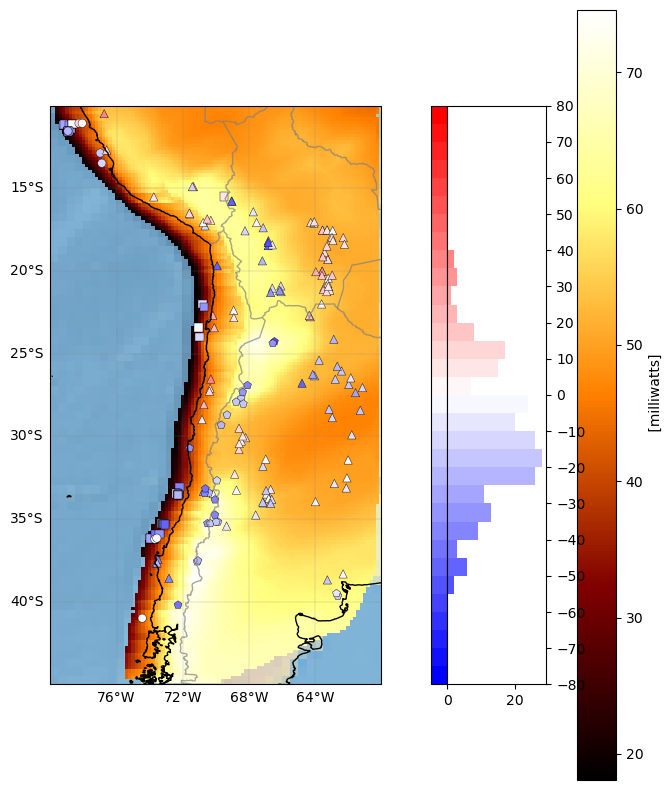

In [12]:
# Plotear datos de ajuste de modelo
plot(L1.get_surface_heat_flow(), shf_data=shf_data, diff=True)


In [13]:
L1.plot(L1.EmptyMap(), shf_data=shf_data, cmap='afmhot', vmin=0, vmax=100, topo=False, border=True, coastline=True, filename='shf_data', format='svg')

/home/zindo/Documents/2023_fin/cod_termal_temporal/cod_termal_exploration_2023/litho/plots.py:364: RuntimeWarning: All-NaN axis encountered
  cbar_max, cbar_min = np.nanmax(array_2D), np.nanmin(array_2D)


<GeoAxes: xlabel='lon', ylabel='lat'>

In [14]:
# Ajustar variables mecánicas
mc = {
    'Bs_t': 20.e3,  #Bs_t     Constante de tension de Byerlee (MPa)
    'Bs_c': -55.e3,  #Bs_c     Constante de compresion de Byerlee (MPa)
    'e': 1e-15,  #e        Strain rate (s-1)
    'R':  8.31,  #R        Constante universal de gases (J mol-1 K-1)
    's_max': 200,  #s_max    Maximo Stress Disponible
}

MM1 = MM(uc=1, lc=14, lm=30, serp=23, serp_pct=0.65, constants=mc) #ver data/Rhe_param

# Asignar un modelo mecánico a "L1"
L1.set_mechanic_state(MM1)

<Axes: title={'center': 'lat = -30.0'}, xlabel='lon', ylabel='Z0 [kilometers]'>

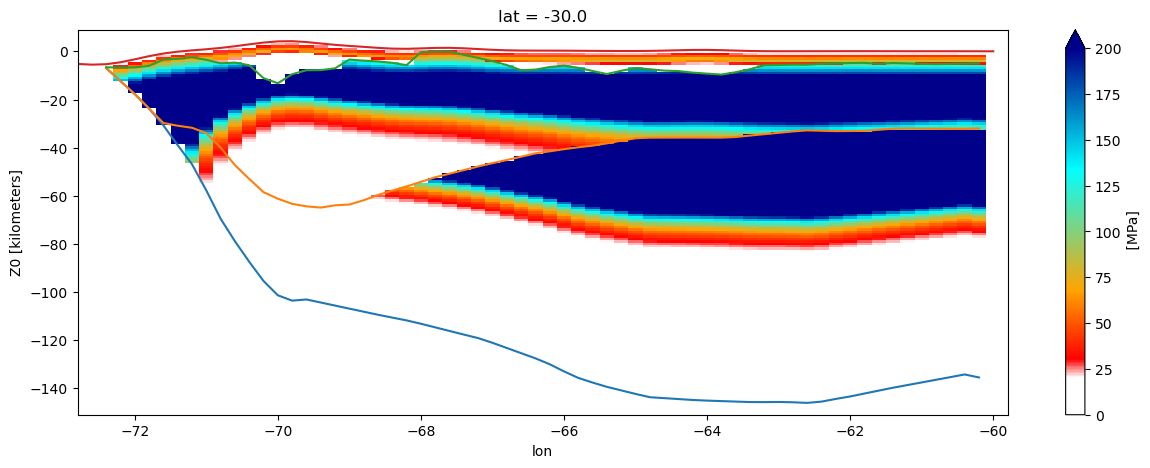

In [15]:
# Plotear sección transversal de la yield strength envelope de "L1"
#L1.set_depths_array({'lat': -30})
#plot(L1.get_yield_strength_envelope())
# O...
plot(L1.get_yield_strength_envelope({'lat': -30}))

<Axes: title={'center': 'lon = -65.0, lat = -30.0'}, xlabel='depth', ylabel=' [MPa]'>

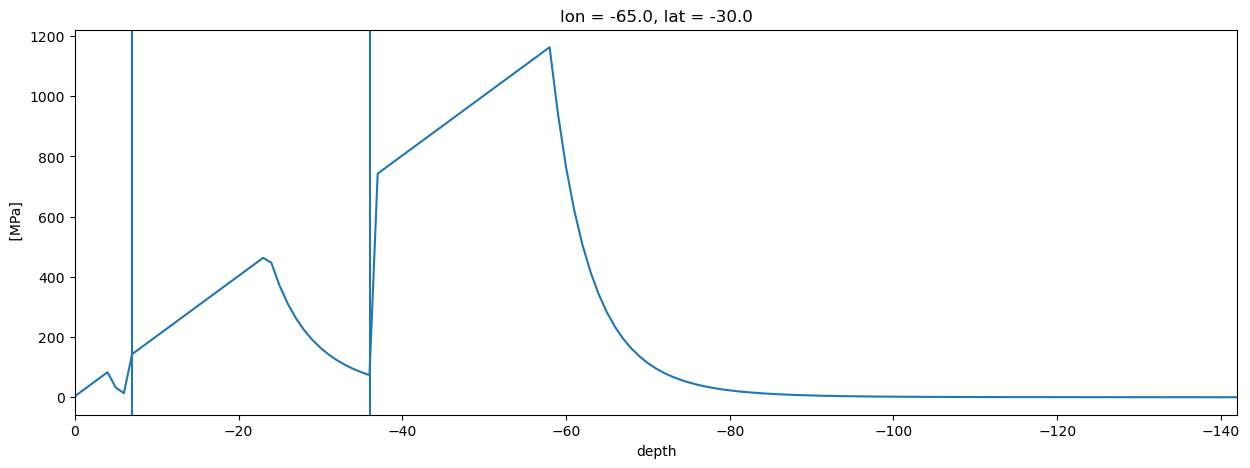

In [16]:
# Plotear perfil de profundidad de yield strength envelope de "L1" 
#L1.set_depths_array({'lat': -30, 'lon': -65})
#plot(L1.get_yield_strength_envelope())
# O...
plot(L1.get_yield_strength_envelope({'lat': -30, 'lon': -65}))

<GeoAxes: title={'center': 'rheo = lm'}, xlabel='lon', ylabel='lat'>

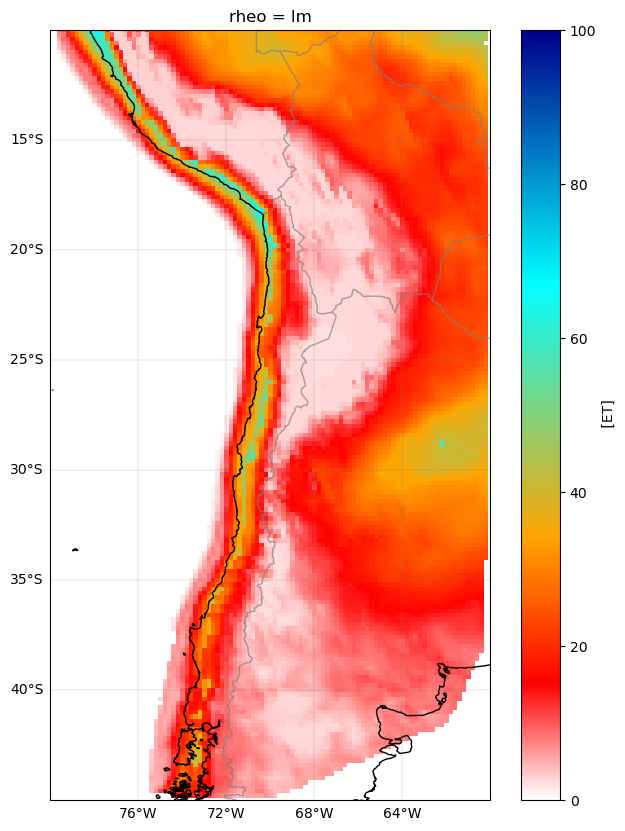

In [17]:
plot(L1.get_eet({}))

<GeoAxes: title={'center': 'depth = -20.0'}, xlabel='lon', ylabel='lat'>

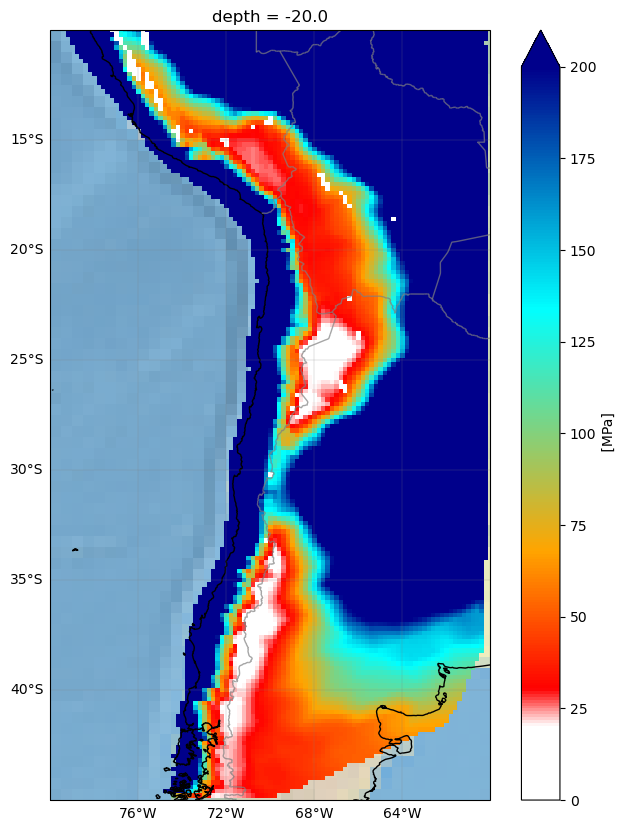

In [18]:
plot(L1.get_yield_strength_envelope({'depth': -20}))

<GeoAxes: xlabel='lon', ylabel='lat'>

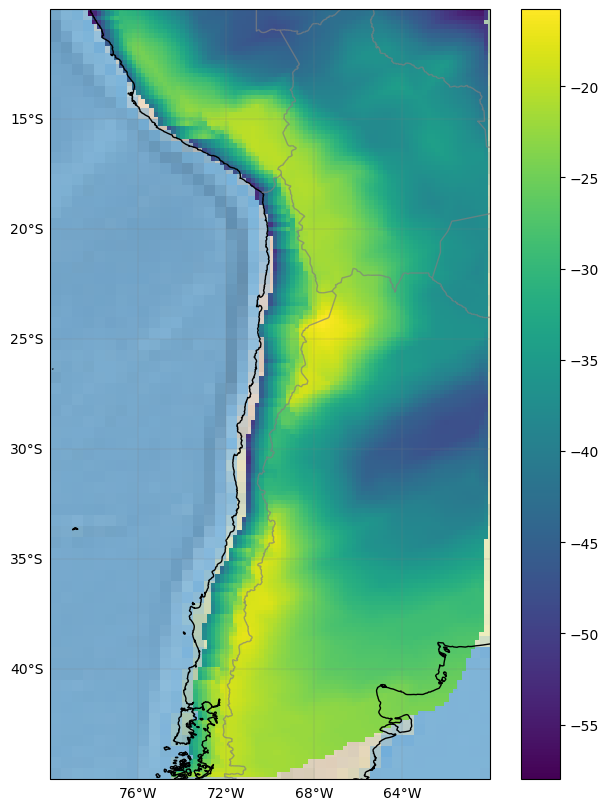

In [19]:
# Obtener mapa de isoterma (o isosuperficie en general)
#L1.set_depths_array() #L1.set_depths_array({'lon': (-80,-60), 'lat': (-45, -10), 'depth': (-180, 5)})
#iso = L1.isosurface(L1.get_geotherm(), 550)
# O...
iso = L1.isosurface(L1.get_geotherm({}), 550)
plot(iso)

<Axes: title={'center': 'lat = -30.0'}, xlabel='lon'>

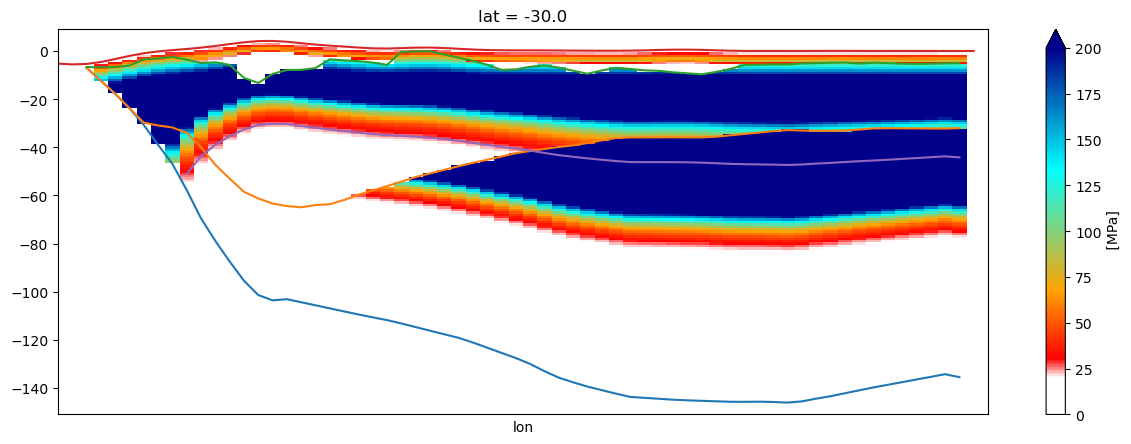

In [20]:
# Obtener isoterma en sección transversal
iso = L1.isosurface(L1.get_geotherm({'lat': -30}), 550)
# Plotear isoterma en sección transversal
ax1= plot(L1.get_yield_strength_envelope({'lat': -30}))
plot(iso, ax=ax1)